Εργασία αριθμητική ανάλυση:
Ιάσων - Δανιήλ Ζακυνθινός 
ΑΕΜ: 10648

In [191]:
import numpy as np

#Ασκηση 1 lUMINE(την έφτιαξα από την αρχή για να την καταλάβω καλύτερα για παρακάτω) 
def LUmine(A):
    n = A.shape[0]
    L = np.identity(n)
    U = np.copy(A)
    
    for j in range(0, n-1):
        
        for i in range(j+1, n):
            mult = U[i, j] / U[j, j] 
            U[i, j+1:n] = U[i, j+1:n] - mult * U[j, j+1:n]
            L[i, j] = mult
            U[i, j] = 0
    return L, U

#Παρδειγμα
A = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
L, U = LUmine(A)

print("L ano trigonikos :")
print(L)
print("U kato trigonikos :")
print (U)
print("L @ U:")
print(L@U)
print("Norm of A - L*U:")
print(np.linalg.norm(A - L@U))



L ano trigonikos :
[[1. 0. 0.]
 [4. 1. 0.]
 [7. 2. 1.]]
U kato trigonikos :
[[ 1  2  3]
 [ 0 -3 -6]
 [ 0  0  0]]
L @ U:
[[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]
Norm of A - L*U:
0.0


In [192]:
import numpy as np

#Ασκηση 1 QRMINE
def QRmine(A):
    n = A.shape[0]
    Q = np.zeros((n, n))
    R = np.zeros((n, n))
    
    for j in range(n):
        q = A[:, j]
        
        for i in range(j):
            R[i, j] = np.dot(Q[:, i].T, A[:, j])
            q = q - R[i, j] * Q[:, i]
        
        R[j, j] = np.linalg.norm(q)
        Q[:, j] = q / R[j, j]
    
    return Q, R

#Παραδειγμα 
A = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
Q, R = QRmine(A)

print("Q orthogonios :")
print(Q)
print("R kato trigonikos :")
print(R)
print("Q*R:")
print(Q @ R)
print("Norm of A - Q*R:")
print(np.linalg.norm(A - Q @ R))

Q orthogonios :
[[ 0.12309149  0.90453403 -0.90453403]
 [ 0.49236596  0.30151134 -0.30151134]
 [ 0.86164044 -0.30151134  0.30151134]]
R kato trigonikos :
[[8.12403840e+00 9.60113630e+00 1.10782342e+01]
 [0.00000000e+00 9.04534034e-01 1.80906807e+00]
 [0.00000000e+00 0.00000000e+00 1.62016501e-14]]
Q*R:
[[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]
Norm of A - Q*R:
0.0


In [193]:

#Ασκηση 2 α) 
def create_hilbert_matrix(n):
    
    if n <= 0:
        raise ValueError("ο n πρέπει να είναι θετικός ακέραιος.")

    
    hilbert_matrix = np.empty((n, n), dtype=float)

   
    for i in range(n):
        for j in range(n):
            hilbert_matrix[i][j] = 1.0 / (i + j + 1)

    return hilbert_matrix

#Παραδειγμα
n1 = 4
H = create_hilbert_matrix(n1)
print("4x4 πίνακας Hilbert: ")
print(H)


4x4 πίνακας Hilbert: 
[[1.         0.5        0.33333333 0.25      ]
 [0.5        0.33333333 0.25       0.2       ]
 [0.33333333 0.25       0.2        0.16666667]
 [0.25       0.2        0.16666667 0.14285714]]


In [194]:
#Ασκηση 2 β) με QRmine
def qr_solve(H, b):
    Q, R = QRmine(H) 
    
    y = np.dot(Q.T, b)
    x = backward_substitution(R, y)
    
    return x

def backward_substitution(U, y):
    n = U.shape[0]
    x = np.zeros(n)
    
    for i in range(n - 1, -1, -1):
        x[i] = y[i]
        for j in range(i + 1, n):
            x[i] -= U[i, j] * x[j]
        x[i] /= U[i, i]
    
    return x

#Παραδειγμα
n = 3 
b = np.ones(n)  
H = create_hilbert_matrix(n)


print("H:")
print(H)
print("b:")
print(b)
print("x για Ηχ=b με χρήση QR:")
x = qr_solve(H, b)
print(x)

H:
[[1.         0.5        0.33333333]
 [0.5        0.33333333 0.25      ]
 [0.33333333 0.25       0.2       ]]
b:
[1. 1. 1.]
x για Ηχ=b με χρήση QR:
[  3. -24.  30.]


In [195]:
#Ασκηση 2 β) με LUmine
def lu_solve(H,b):
    n = H.shape[0]
    
    
    L, U = LUmine(H) 
    
    y = np.zeros(n)
    for i in range(n):
        y[i] = b[i] - np.dot(L[i, :i], y[:i])
    
    
    x = np.zeros(n)
    for i in range(n-1, -1, -1):
        x[i] = (y[i] - np.dot(U[i, i+1:], x[i+1:])) / U[i, i]
    
    return x

#Παραδειγμα
b = np.ones(n) 
H = create_hilbert_matrix(n)

print("H:")
print(H)
print("b:")
print(b)
print("x για Ηχ=b με χρήση LU:")
x = lu_solve(H,b)
print(x)

H:
[[1.         0.5        0.33333333]
 [0.5        0.33333333 0.25      ]
 [0.33333333 0.25       0.2       ]]
b:
[1. 1. 1.]
x για Ηχ=b με χρήση LU:
[  3. -24.  30.]


In [196]:
#Ασκηση 2 γ)" 
bnew = b
bnew = b.copy()
bnew[0] += 1e-15
print(bnew)
xnew = lu_solve(H,bnew)

print("Λύση xnew:")
print(xnew)


abs = np.max(np.abs(x-xnew))
print("μέγιστη απόλυτη διαφορά:")
print(abs)

[1. 1. 1.]
Λύση xnew:
[  3. -24.  30.]
μέγιστη απόλυτη διαφορά:
2.1316282072803006e-14


Παρατηρώ ότι η μέγιστη απόλυτη διαφορά είναι πάρα πολύ μικρή το οποίο είναι και λογικό καθώς και η μεταβολή που προκαλέσαμε είναι πάρα πολύ μικρή (10^(-15)) 

In [197]:

n_values = np.arange(1, 40) 
max_diffsLU = []  
max_diffsQR = []  

In [198]:
#Ασκηση 2δ) με LU
for n in n_values:
    hilbert = create_hilbert_matrix(n)

    b = np.ones(n)
    bnew = b.copy()
    bnew[0] += 1e-15

    x = lu_solve(hilbert,b)
    xnew = lu_solve(hilbert,bnew)

    max_diffLU = np.max(np.abs(x - xnew))
    max_diffsLU.append(max_diffLU)

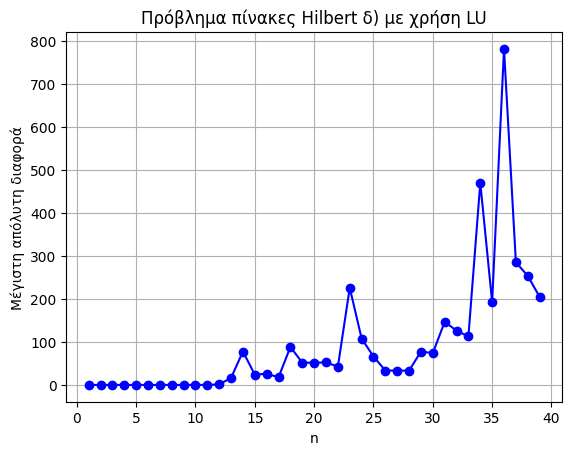

In [199]:
#Πλοτάρισμα της 2δ 

plt.plot(n_values, max_diffsLU, 'bo-')
plt.xlabel('n')
plt.ylabel('Μέγιστη απόλυτη διαφορά')
plt.title('Πρόβλημα πίνακες Hilbert δ) με χρήση LU')
plt.grid(True)
plt.show()

In [200]:
#Ασκηση 2δ) με QR
for n in n_values:
    hilbert = create_hilbert_matrix(n)

    b = np.ones(n)
    bnew = b.copy()
    bnew[0] += 1e-15

    x = qr_solve(hilbert,b)
    xnew = qr_solve(hilbert,bnew)

    max_diffQR = np.max(np.abs(x - xnew))
    max_diffsQR.append(max_diffQR)

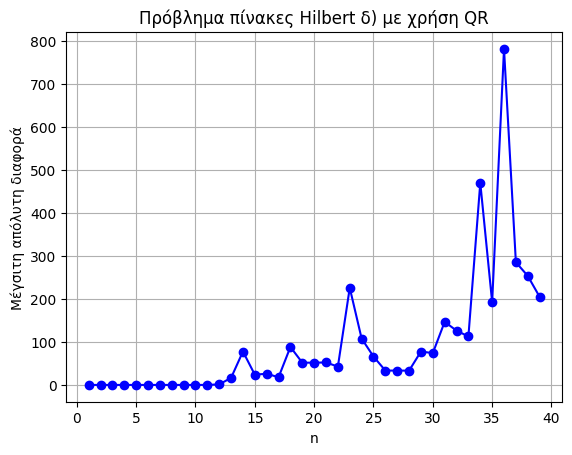

In [201]:
#Πλοταρισμα της 2δ) 

plt.plot(n_values, max_diffsLU, 'bo-')
plt.xlabel('n')
plt.ylabel('Μέγσιτη απόλυτη διαφορά')
plt.title('Πρόβλημα πίνακες Hilbert δ) με χρήση QR')
plt.grid(True)
plt.show()

Παρατηρώ ότι όσο αυξάνεται το n αυξάνεται και η μέγιστη απόλυτη διαφορά. Παράλληλα παρατηρώ πως το διάγραμμα δεν είναι ομαλό , γεγονός που μπορεί να αποδοθεί στην συμπεριφορά των πινάκων Hilbert. Τέλος παρατηρώ ότι οι δύο μέθοδοι QR και LU είναι εξίσου αποτελεσματκές καθώς φτάνουμε στο ακριβώς ίδιο διάγραμμα 

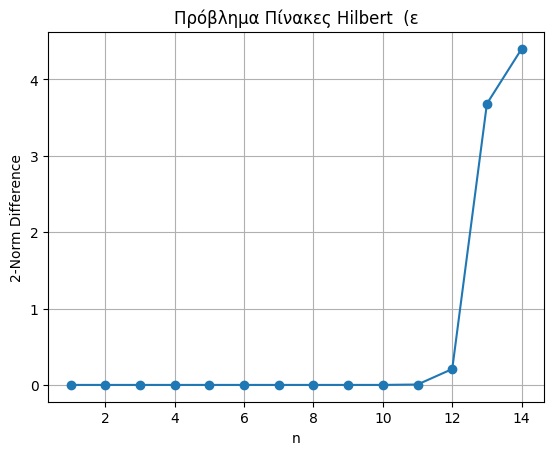

In [202]:
#Ασκηση 2ε) 

def calculate_norm_difference(n):
    H = create_hilbert_matrix(n) 
    H_inverse = np.linalg.inv(H)
    unit_matrix = np.identity(n)
    difference = unit_matrix - np.dot(H, H_inverse)
    norm_difference = np.linalg.norm(difference, ord=2)
    return norm_difference

n_values = range(1, 15) 
norm_values = [calculate_norm_difference(n) for n in n_values]

#Πλοταρισμα του ε
plt.plot(n_values, norm_values, 'o-')
plt.xlabel('n')
plt.ylabel('2-Norm Difference')
plt.title('Πρόβλημα Πίνακες Hilbert  (ε')
plt.grid(True)
plt.show()

καθώς αυξάνεται το n , αυξάνεται και η 2 νόρμα της διαφοράς μεταξύ του γινομένου του πίνακα Hilbert με τον αντίστροφο του και του μοναδιαίου πίνακα.

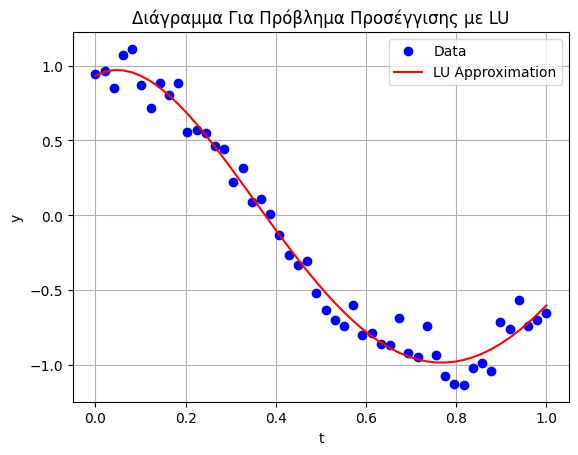

Άθροισμα τετραγωνικών σφαλμάτων (LU): 0.4872104851432076


In [203]:
#Ασκηση 3 

def create_polynomial_matrix(t, degree):
    n = t.shape[0]
    A = np.zeros((n, degree + 1))
    
    for i in range(degree + 1):
        A[:, i] = t ** i
    
    return A

def optimal_approximation(t, y, degree, method):
    A = create_polynomial_matrix(t, degree)
    
    if method == 'LU':
        coefficients = lu_solve(np.dot(A.T, A), np.dot(A.T, y))
    elif method == 'QR':
        coefficients = qr_solve(np.dot(A.T, A), np.dot(A.T, y))
    
    approximated_values = np.dot(A, coefficients)
    sum_squared_errors = np.sum((y - approximated_values) ** 2)
    
    return coefficients, sum_squared_errors


n = 50
t = np.linspace(0, 1, n)
y = np.cos(4 * t) + 0.1 * np.random.randn(t.shape[0])

#προσεγγιση με LU
lu_coefficients, lu_error = optimal_approximation(t, y, 4, 'LU')

#προσεγγιση με QR
qr_coefficients, qr_error = optimal_approximation(t, y, 4, 'QR')

#πλοταρισμα με LU
plt.plot(t, y, 'bo', label='Data')
plt.plot(t, np.polyval(lu_coefficients[::-1], t), 'r-', label='LU Approximation')
plt.xlabel('t')
plt.ylabel('y')
plt.title('Διάγραμμα Για Πρόβλημα Προσέγγισης με LU')
plt.legend()
plt.grid(True)
plt.show()

print(f'Άθροισμα τετραγωνικών σφαλμάτων (LU): {lu_error}')

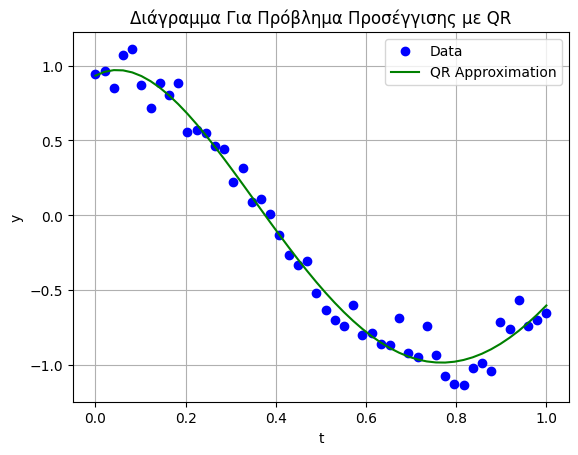

Άθροισμα τετραγωνικών σφαλμάτων (QR): 0.4872104851432381


In [204]:
#πλοταρισμα με QR
plt.plot(t, y, 'bo', label='Data')
plt.plot(t, np.polyval(qr_coefficients[::-1], t), 'g-', label='QR Approximation')
plt.xlabel('t')
plt.ylabel('y')
plt.title('Διάγραμμα Για Πρόβλημα Προσέγγισης με QR')
plt.legend()
plt.grid(True)
plt.show()

print(f'Άθροισμα τετραγωνικών σφαλμάτων (QR): {qr_error}')